## Ссылка на диск с картированными чтениями


| | SRA accession  | Stage    |
|---:|:-------------|:-----------|
| 1 | SRR5836473  | 8 cell       |
| 2 | SRR3824222 | Epiblast    |
| 3 | SRR5836475  | ICM       |


[Bam-файлы и отчеты](https://drive.google.com/drive/folders/1hGzGjuUZNLIeUsCdSxbEzgthcV_BaqMw?usp=sharing)

# Установка FastQC

Перезапускал ноутбук, отчеты есть в readme

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
!unzip fastqc_v0.11.9.zip -y
!chmod a+x FastQC/fastqc

--2024-02-11 13:00:54--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10249221 (9.8M) [application/zip]
Saving to: ‘fastqc_v0.11.9.zip’

fastqc_v0.11.9.zip  100%[===================>]   9.77M  4.39MB/s    in 2.2s    

2024-02-11 13:00:58 (4.39 MB/s) - ‘fastqc_v0.11.9.zip’ saved [10249221/10249221]

Archive:  fastqc_v0.11.9.zip
caution: filename not matched:  -y
chmod: cannot access 'FastQC/fastqc': No such file or directory


Можно получать данные секвенировия с ENA. Например, https://www.ebi.ac.uk/ena/browser/view/SRR5836473

In [ ]:
! wget -O SRR5836473_1_latest.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz

--2024-02-11 13:01:03--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_1.fastq.gz
           => ‘SRR5836473_1_latest.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_1.fastq.gz ... 6856386252
==> PASV ... done.    ==> RETR SRR5836473_1.fastq.gz ... done.
Length: 6856386252 (6.4G) (unauthoritative)

SRR5836473_1.fastq.  81%[===============>    ]   5.22G  1.09MB/s    eta 13m 22s

In [ ]:
! wget -O SRR5836473_2_latest.fastq.gz ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_2.fastq.gz

--2024-02-10 22:04:48--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR583/003/SRR5836473/SRR5836473_2.fastq.gz
           => ‘SRR5836473_2_new_2.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR583/003/SRR5836473 ... done.
==> SIZE SRR5836473_2.fastq.gz ... 8127008133
==> PASV ... done.    ==> RETR SRR5836473_2.fastq.gz ... done.
Length: 8127008133 (7.6G) (unauthoritative)

SRR5836473_2.fastq.   0%[                    ]   5.13M   229KB/s    eta 8h 51m ^C


In [ ]:
! gzip -d SRR5836473_1_latest.fastq.gz


gzip: SRR5836473_1.fastq.gz: unexpected end of file


In [ ]:
! gzip -d SRR5836473_2_latest.fastq.gz

In [ ]:
!./FastQC/fastqc SRR5836473_1_latest.fastq

Skipping 'SRR5836473_1.fastq' which didn't exist, or couldn't be read


In [ ]:
!./FastQC/fastqc SRR5836473_2_latest.fastq

# Установка Bismark с зависимостями (+bowtie2, samtools)

In [ ]:
! pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
! conda install -c bioconda bismark

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: | / - done

# All requested packages already installed.



In [ ]:
! samtools view


Usage: samtools view [options] <in.bam>|<in.sam>|<in.cram> [region ...]

Output options:
  -b, --bam                  Output BAM
  -C, --cram                 Output CRAM (requires -T)
  -1, --fast                 Use fast BAM compression (and default to --bam)
  -u, --uncompressed         Uncompressed BAM output (and default to --bam)
  -h, --with-header          Include header in SAM output
  -H, --header-only          Print SAM header only (no alignments)
      --no-header            Print SAM alignment records only [default]
  -c, --count                Print only the count of matching records
  -o, --output FILE          Write output to FILE [standard output]
  -U, --unoutput FILE, --output-unselected FILE
                             Output reads not selected by filters to FILE
  -p, --unmap                Set flag to UNMAP on reads not selected
                             then write to output file.
  -P, --fetch-pairs          Retrieve complete pairs even when outside of region

1. Скачиваем чтения из SRA с помощью SRAtoolkit или любым другим способом

2. Индексируем геном

3. Строим выравнивание

(Описание шагов 2-3 см https://www.bioinformatics.babraham.ac.uk/projects/bismark/Bismark_User_Guide.pdf)

#Внимание!

Т.к. вычислительные мощности нужны большие, то этот шаг был сделан за вас.
 Достаточно скачать выравнивания с диска https://drive.google.com/drive/folders/1hGzGjuUZNLIeUsCdSxbEzgthcV_BaqMw?usp=sharing или с сервера майнора)

In [ ]:
!pip install -q gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
url = 'https://drive.google.com/uc?id=1vZUsitBBYAYaVHbfonRuoHEK_toNZnN5'
out = 'SRR3824222_1_bismark_bt2_pe.bam'
!gdown {url} -O {out}

Downloading...
From (original): https://drive.google.com/uc?id=1vZUsitBBYAYaVHbfonRuoHEK_toNZnN5
From (redirected): https://drive.google.com/uc?id=1vZUsitBBYAYaVHbfonRuoHEK_toNZnN5&confirm=t&uuid=970ca863-2cbf-493d-aa1b-5acba86b6fc9
To: /content/SRR3824222_1_bismark_bt2_pe.bam
100% 2.04G/2.04G [00:19<00:00, 105MB/s] 


In [ ]:
url = 'https://drive.google.com/uc?id=1h8kqppLRjNoK2uwcnXfK7iQbe_sXQmor'
out = 'SRR5836473_1_bismark_bt2_pe.bam'
!gdown {url} -O {out}

Downloading...
From (original): https://drive.google.com/uc?id=1h8kqppLRjNoK2uwcnXfK7iQbe_sXQmor
From (redirected): https://drive.google.com/uc?id=1h8kqppLRjNoK2uwcnXfK7iQbe_sXQmor&confirm=t&uuid=4a366256-7704-4e8a-b5ff-ba62cc7d5376
To: /content/SRR5836473_1_bismark_bt2_pe.bam
100% 806M/806M [00:05<00:00, 147MB/s]


In [ ]:
url = 'https://drive.google.com/uc?id=1yDVwkpPriz1ZMPSBkTm-5A6lNzXJJk6I'
out = 'SRR5836475_1_bismark_bt2_pe.bam'
!gdown {url} -O {out}

Downloading...
From (original): https://drive.google.com/uc?id=1yDVwkpPriz1ZMPSBkTm-5A6lNzXJJk6I
From (redirected): https://drive.google.com/uc?id=1yDVwkpPriz1ZMPSBkTm-5A6lNzXJJk6I&confirm=t&uuid=cc746d4e-2682-4ff5-b565-d7cbb648ab14
To: /content/SRR5836475_1_bismark_bt2_pe.bam
100% 1.20G/1.20G [00:21<00:00, 56.2MB/s]


In [ ]:
! ls -lh

total 263M
-rw-r--r-- 1 root root  23K Feb 10 15:13 condacolab_install.log
drwxr-xr-x 8 root root 4.0K Feb 10 15:04 FastQC
-rw-r--r-- 1 root root 9.8M Jan 15  2020 fastqc_v0.11.9.zip
drwxr-xr-x 1 root root 4.0K Feb  8 14:21 sample_data
-rw-r--r-- 1 root root 5.0M Feb 10 15:20 SRR5836473_1_bismark_bt2_pe.bam
-rw-r--r-- 1 root root 245M Feb 10 15:13 SRR5836473_1.fastq.gz
-rw-r--r-- 1 root root 896K Feb 10 15:13 SRR5836473_2.fastq.gz
-rw-r--r-- 1 root root 2.0M Feb 10 15:20 SRR5836475_1_bismark_bt2_pe.bam


In [ ]:
! samtools view SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.41_41_length=140	99	chr11	40076664	0	140M	=	40076703	178	AATTTTTTTGGGGATTGTATTGAATTTGTAGATTGTTTTTGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATT	KKKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKKFKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7<77FF	NM:i:28	MD:Z:6G0A9C7C9C6C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C1	XM:Z:.................h.......x.........h......h.......hh.......h.........hx..hh...hh.....h.........h...hh..h..x......h..h........h...h..x.....h.	XR:Z:CT	XG:Z:CT
SRR5836473.41_41_length=140	147	chr11	40076703	0	139M	=	40076664	-178	TGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATTTGAAGTTTTTATTATATAGATTTTTTATTTTTTTAGTG	KKKKKAAFFFKKKKKKKKKKKKKFFKKKKKKKKKKFAFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:31	MD:Z:3C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C8C4C3A4C

In [ ]:
! samtools view SRR5836475_1_bismark_bt2_pe.bam | head

SRR5836475.1_1_length=140	83	chr11	27560911	0	139M	=	27560897	-153	TTACAAAAAATTTAAAACAAATAAAATAAAAACAAAATAAACCTTTAATAACCTTAAAAAAAATAACTACCCCTCTTTTATTTTAAAAAACCAATTCTTTAAAATACAATAAACACATTCAACTATTCCTTATCCCATA	FKKAKAKKKKKKKKKKKKKKKKKKFKKKKKKKKKFAKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:39	MD:Z:0G1G3G7G0G8G0G1G2G0G3G0G1G0G0G5G0G1G5G0G0G0G0G1T3G2G10G1C5G1G12G0G1G1G2G1G3G14G6G0	XM:Z:..h...h.......hh........hh.h..hh...hh.hhh.....hh.h.....hhhhh.....h..x..........h.......h.h............hh.h.z..h.h...z..............h......h	XR:Z:CT	XG:Z:GA
SRR5836475.1_1_length=140	163	chr11	27560897	0	140M	=	27560911	153	CCTTTAATATCAATTTACAAAAAATTTAAAACAAATAAAATAAAAACAAAATAAACCTTTAATAACCTTAAAAAAAATAACTACCCCTCTTTTATTTTAAAAAACCAATTCTTTAAAATACAATAAACACATTCAACTAT	FFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKFKKKKKKKKKKKKAKKKKFKKKFFKKKKKFKKAAKKKAFAAFKKKF<AKKK	NM:i:41	MD:Z:2C2G5G0G1G1G3G7G0G8G0G1G2G0G3G0G1G

In [ ]:
! samtools view SRR3824222_1_bismark_bt2_pe.bam | head

SRR3824222.171_171_length=140	83	chr11	57255358	3	140M	=	57255170	-328	ATTTACACAATAAAATACTACTCAACTATTAAAAAAAATAAATTTATAAAATTCTTAAACAAATAAATAAACCTAAAAAACATCATCCTAAGTAAAATAACCCAATCACAAAAAAACTCACATAATATATACTCACTAAT	KKKKKKKKKKKKKKKKKKKAFF,FF<FA,FA,KKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7,KKKKKKKKKKKKKKKKKKKF<<<F7,KKKKKKKKFKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKK	NM:i:29	MD:Z:11G0G1G9G10G3G7G6C2G0G5G0G2G0G4T0G1G0G0G9G3G1G0G15G0G5G2C5G8G2	XM:Z:...........hh.h.........x..........h...h.......h.........hh.....hh..hh.....h.hhh.........x.H.h.hh...............hh.....z........h........x..	XR:Z:CT	XG:Z:GA
SRR3824222.171_171_length=140	163	chr11	57255170	3	139M	=	57255358	328	AAGAAAGGAACATAATACTACCGAAAAATCCAACAATACCTCTCCTAAACATATATCCAAAAAATATTCCAACCGATAAAAAAAACACATACTCAACTATATTCATAACAACCTTATTTATAATAACCAAAATCTAAAA	FFFFKKFKKKKKKKKKKKKKKKKFKKKKKKKKKKKKKKKKFKKKKKKKKKKAKKKKKKKKKKKKKKKKKKKKKKK<<FKKAKKKKKKKFKKKFKKKKKKKFKKKKKKKKKKKKKF<F<AFKKKFKKKKFK7FAFFKKKK	NM:i:30	MD:Z:0G1A2T0T1G5G7A0G1G0G5G13G1G10G5G9G3G2G0G0G5G9

In [ ]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o sorted_8cell.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...


In [ ]:
! samtools index  sorted_8cell.bam

In [ ]:
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sorted_icm.bam
! samtools index  sorted_icm.bam

[E::hts_open_format] Failed to open file "sorted_icm.bam.tmp.0000.bam" : File exists
samtools sort: failed to create "sorted_icm.bam.tmp.0000.bam": File exists
[E::hts_open_format] Failed to open file "sorted_icm.bam.tmp.0000-001.bam" : File exists
samtools sort: failed to create "sorted_icm.bam.tmp.0000-001.bam": File exists
[E::hts_open_format] Failed to open file "sorted_icm.bam.tmp.0001.bam" : File exists
samtools sort: failed to create "sorted_icm.bam.tmp.0001.bam": File exists
[E::hts_open_format] Failed to open file "sorted_icm.bam.tmp.0002.bam" : File exists
samtools sort: failed to create "sorted_icm.bam.tmp.0002.bam": File exists
[E::hts_open_format] Failed to open file "sorted_icm.bam.tmp.0003.bam" : File exists
samtools sort: failed to create "sorted_icm.bam.tmp.0003.bam": File exists
[bam_sort_core] merging from 5 files and 1 in-memory blocks...


In [ ]:
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sorted_epiblast.bam
! samtools index  sorted_epiblast.bam

[bam_sort_core] merging from 9 files and 1 in-memory blocks...


Сколько ридов закартировалось на регион 58717111-58917111 в образце 8-cell?

In [ ]:
! samtools view sorted_8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l

551


In [ ]:
! samtools view sorted_8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

194


In [ ]:
! samtools view sorted_icm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_icm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

797
274


In [ ]:
! samtools view sorted_epiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sorted_epiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

1344
565


In [ ]:
import pandas as pd
df = pd.DataFrame({ 'Образцы': ['8 Cell', 'ICM', 'Epiblast'],
                   'chr11:11347700-11367700': [551, 797, 1344],
                    'chr11:40185800-40195800': [194, 274, 565]})
df

,Образцы,chr11:11347700-11367700,chr11:40185800-40195800
0,8 Cell,551,194
1,ICM,797,274
2,Epiblast,1344,565


Дедупликация

In [ ]:
! deduplicate_bismark  --bam  --paired  -o s_8_cell  SRR5836473_1_bismark_bt2_pe.bam

Output filename was given as: s_8_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: s_8_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.19.2	CL:/usr/

In [ ]:
! deduplicate_bismark  --bam  --paired  -o icm_cell  SRR5836475_1_bismark_bt2_pe.bam

Output filename was given as: icm_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR5836475_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836475_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR5836475_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: icm_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR5836475_1.fq -2 SRR5836475_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.19.2	CL:/usr/local/bin/samtools view -h --threads 1 SRR5836475_1_bismark_bt2_

In [ ]:
! deduplicate_bismark  --bam  --paired  -o epiblast_cell  SRR3824222_1_bismark_bt2_pe.bam

Output filename was given as: epiblast_cell
Processing paired-end Bismark output file(s) (SAM format):
SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR3824222_1_bismark_bt2_pe.bam<< for signs of file truncation...



Now testing Bismark result file SRR3824222_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: epiblast_cell.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR5836473_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP:Bismark	VN:1.19.

In [ ]:
! ls

checksum.md5				sorted_epiblast.bam.bai
condacolab_install.log			sorted_icm.bam
epiblast_cell.deduplicated.bam		sorted_icm.bam.bai
epiblast_cell.deduplication_report.txt	sorted_icm.bam.tmp.0000-001.bam
FastQC					sorted_icm.bam.tmp.0000.bam
fastqc_v0.11.9.zip			sorted_icm.bam.tmp.0001.bam
fastqc_v0.11.9.zip.1			sorted_icm.bam.tmp.0002.bam
fastqc_v0.11.9.zip.2			sorted_icm.bam.tmp.0003.bam
icm_cell.deduplicated.bam		SRR3824222_1_bismark_bt2_pe.bam
icm_cell.deduplication_report.txt	SRR5836473_1_bismark_bt2_pe.bam
s_8_cell.deduplicated.bam		SRR5836473_1.fastq.gz
s_8_cell.deduplication_report.txt	SRR5836473_1.fastq.gz.1
sample_data				SRR5836473_1.fastq.gz.2
sorted_8cell.bam			SRR5836473_2.fastq.gz
sorted_8cell.bam.bai			SRR5836473_2.fastq.gz.1
sorted_epiblast.bam			SRR5836475_1_bismark_bt2_pe.bam


11-ю хромосому мыши можно скачать с UCSC (сборка mm39)

In [ ]:
# ! unzip mouse_chr.zip

unzip:  cannot find or open mouse_chr.zip, mouse_chr.zip.zip or mouse_chr.zip.ZIP.


Время работы: ±30 мин

In [ ]:
# ! head s_8_cell.deduplicated.bedGraph

head: cannot open 's_8_cell.deduplicated.bedGraph' for reading: No such file or directory


Добавил папку с файлом вручную

Коллинг метилирования

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr s_8_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file s_8_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr icm_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file icm_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine posit

In [ ]:
! bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr epiblast_cell.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file epiblast_cell.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/content')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a cutoff of 1 read(s) to report cytosine 

In [ ]:
! ls -lh

total 14G
-rw-r--r-- 1 root root   198 Feb 10 15:29 checksum.md5
-rw-r--r-- 1 root root   13K Feb 10 20:42 CHG_CTOB_epiblast_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  9.4K Feb 10 19:23 CHG_CTOB_icm_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  7.7K Feb 10 18:39 CHG_CTOB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   14K Feb 10 20:42 CHG_CTOT_epiblast_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   10K Feb 10 19:23 CHG_CTOT_icm_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  8.2K Feb 10 18:39 CHG_CTOT_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb 10 20:42 CHG_OB_epiblast_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   84M Feb 10 19:23 CHG_OB_icm_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb 10 18:39 CHG_OB_s_8_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root  157M Feb 10 20:42 CHG_OT_epiblast_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   85M Feb 10 19:23 CHG_OT_icm_cell.deduplicated.txt.gz
-rw-r--r-- 1 root root   51M Feb 10 18:39 CHG

In [ ]:
! bismark2report -alignment_report SRR5836473_1_bismark_bt2_PE_report.txt -mbias_report s_8_cell.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> s_8_cell.deduplicated.M-bias.txt <
Processing M-bias report s_8_cell.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! bismark2report -alignment_report SRR5836475_1_bismark_bt2_PE_report.txt -mbias_report icm_cell.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR5836475_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836475_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836475_1_bismark_bt2_PE_report.txt ...
Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> icm_cell.deduplicated.M-bias.txt <
Processing M-bias report icm_cell.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! bismark2report -alignment_report SRR3824222_1_bismark_bt2_PE_report.txt -mbias_report epiblast_cell.deduplicated.M-bias.txt


Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

No deduplication report file specified, skipping this step
No splitting report file specified, skipping this step
Using the following M-bias report:		> epiblast_cell.deduplicated.M-bias.txt <
Processing M-bias report epiblast_cell.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [ ]:
! gzip -d s_8_cell.deduplicated.bedGraph.gz

In [ ]:
! head s_8_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [ ]:
! gzip -d icm_cell.deduplicated.bedGraph.gz
! head icm_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	33.3333333333333
chr11	3050031	3050032	50
chr11	3050047	3050048	50
chr11	3050048	3050049	57.1428571428571
chr11	3050223	3050224	36.3636363636364
chr11	3050224	3050225	22.7272727272727
chr11	3050285	3050286	25
chr11	3050286	3050287	28.5714285714286
chr11	3050309	3050310	22.2222222222222


In [ ]:
! gzip -d epiblast_cell.deduplicated.bedGraph.gz
! head epiblast_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	75
chr11	3050031	3050032	100
chr11	3050047	3050048	100
chr11	3050048	3050049	100
chr11	3050223	3050224	96.875
chr11	3050224	3050225	93.75
chr11	3050285	3050286	93.3333333333333
chr11	3050286	3050287	90
chr11	3050309	3050310	96.7741935483871


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("s_8_cell.deduplicated.bedGraph", delimiter='\t', skiprows=1, header=None)
df.head()

,0,1,2,3
0,chr11,3050030,3050031,50.000000
1,chr11,3050047,3050048,66.666667
2,chr11,3050048,3050049,50.000000
3,chr11,3050223,3050224,87.500000
4,chr11,3050224,3050225,53.333333


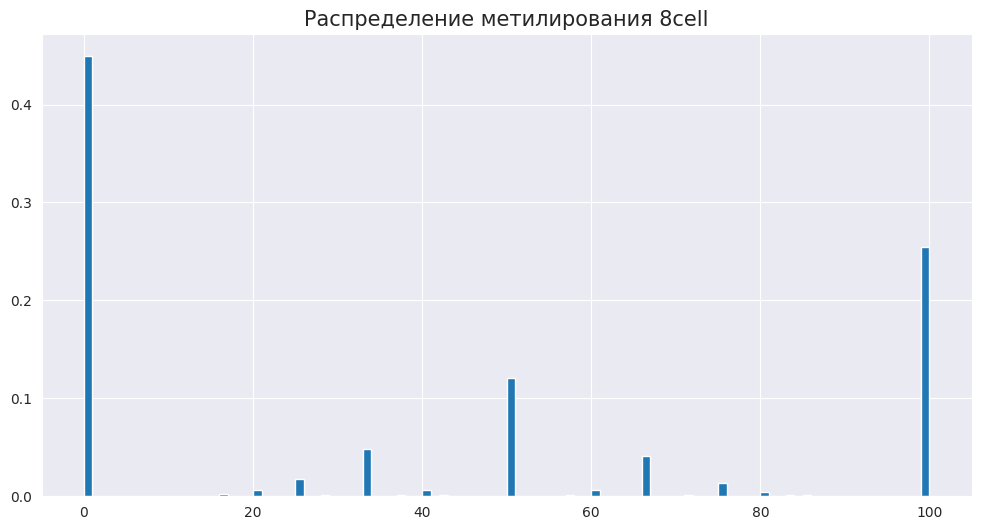

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=[12, 6])
plt.title("Распределение метилирования 8cell", fontsize=15)
plt.hist(df[3], bins=100, density=True)
plt.show()

In [ ]:
df = pd.read_csv("icm_cell.deduplicated.bedGraph", delimiter='\t', skiprows=1, header=None)
df.head()

,0,1,2,3
0,chr11,3050030,3050031,33.333333
1,chr11,3050031,3050032,50.000000
2,chr11,3050047,3050048,50.000000
3,chr11,3050048,3050049,57.142857
4,chr11,3050223,3050224,36.363636


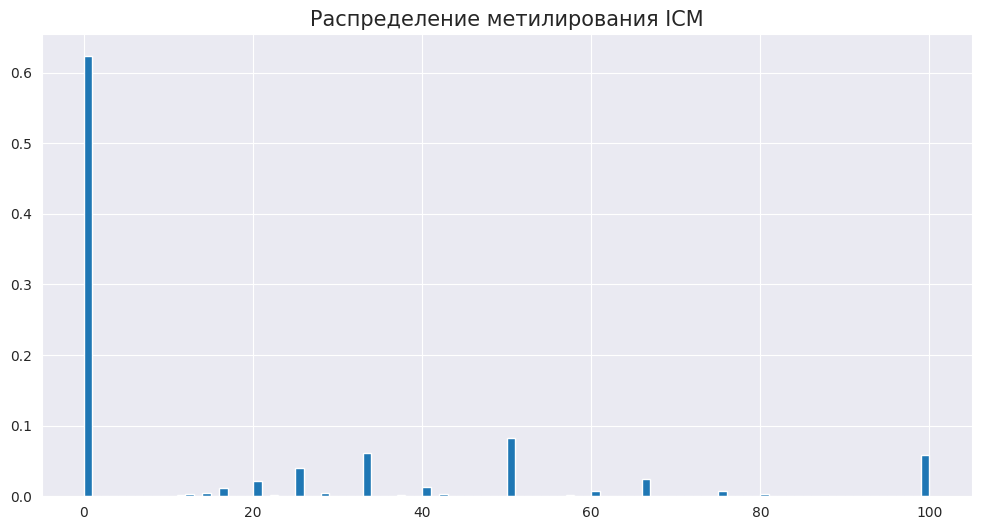

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=[12, 6])
plt.title("Распределение метилирования ICM", fontsize=15)
plt.hist(df[3], bins=100, density=True)
plt.show()

In [ ]:
df = pd.read_csv("epiblast_cell.deduplicated.bedGraph", delimiter='\t', skiprows=1, header=None)
df.head()

,0,1,2,3
0,chr11,3050030,3050031,75.000
1,chr11,3050031,3050032,100.000
2,chr11,3050047,3050048,100.000
3,chr11,3050048,3050049,100.000
4,chr11,3050223,3050224,96.875


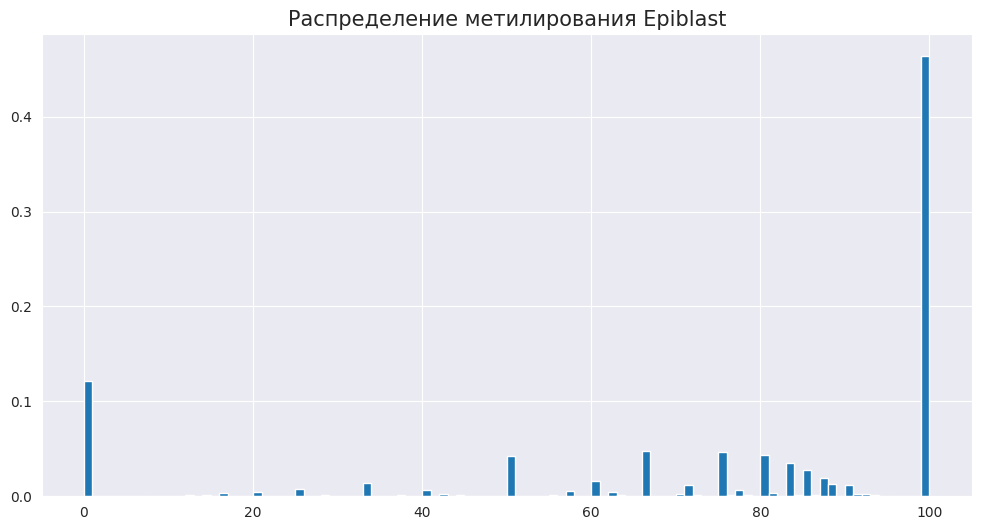

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=[12, 6])
plt.title("Распределение метилирования Epiblast", fontsize=15)
plt.hist(df[3], bins=100, density=True)
plt.show()

In [ ]:
! gzip -d s_8_cell.deduplicated.bismark.cov.gz
! head s_8_cell.deduplicated.bismark.cov

chr11	3050031	3050031	50	1	1
chr11	3050048	3050048	66.6666666666667	2	1
chr11	3050049	3050049	50	1	1
chr11	3050224	3050224	87.5	7	1
chr11	3050225	3050225	53.3333333333333	8	7
chr11	3050286	3050286	66.6666666666667	6	3
chr11	3050287	3050287	33.3333333333333	5	10
chr11	3050310	3050310	62.5	5	3
chr11	3050311	3050311	50	7	7
chr11	3050349	3050349	55.5555555555556	5	4


In [ ]:
! gzip -d icm_cell.deduplicated.bismark.cov.gz
! head icm_cell.deduplicated.bismark.cov

chr11	3050031	3050031	33.3333333333333	1	2
chr11	3050032	3050032	50	3	3
chr11	3050048	3050048	50	2	2
chr11	3050049	3050049	57.1428571428571	4	3
chr11	3050224	3050224	36.3636363636364	4	7
chr11	3050225	3050225	22.7272727272727	5	17
chr11	3050286	3050286	25	2	6
chr11	3050287	3050287	28.5714285714286	6	15
chr11	3050310	3050310	22.2222222222222	2	7
chr11	3050311	3050311	41.1764705882353	7	10


In [ ]:
! gzip -d epiblast_cell.deduplicated.bismark.cov.gz
! head epiblast_cell.deduplicated.bismark.cov

chr11	3050031	3050031	75	3	1
chr11	3050032	3050032	100	4	0
chr11	3050048	3050048	100	5	0
chr11	3050049	3050049	100	9	0
chr11	3050224	3050224	96.875	31	1
chr11	3050225	3050225	93.75	30	2
chr11	3050286	3050286	93.3333333333333	28	2
chr11	3050287	3050287	90	36	4
chr11	3050310	3050310	96.7741935483871	30	1
chr11	3050311	3050311	97.5609756097561	40	1


In [ ]:
! pip install pyGenomeTracks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.1/386.1 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
! conda install -c bioconda ucsc-fetchchromsizes

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: / - \ | warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
/ - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - package ucsc-fetchchromsizes-324-0 requires openssl >=1.1.0,<=1.1.1, but none of the providers can be installed

Could not solve for environment specs
The following packages are incompatible
├─ mamba >=1.5.5  is installable with the potential options
│  ├─ mamba [1.5.5|1.5.6] would require
│  │  ├─ libmambapy 1.5.6 py310h39ff949_0, which requires
│  │  │  └─ libmamba 1.5.6 had39da4_0, which requires
│  │  │     └─ openssl >=3.2.0,<4.0a0 , which can be installed;
│  │  └─ openssl >=3.2.0,<4.0a0 , which can be installed;
│  ├─ mamba [1.5.5|1.5.6] would require
│  │  └─ python >

In [ ]:
# ! fetchChromSizes mm10 > m.chrom.sizes

/bin/bash: line 1: fetchChromSizes: command not found


In [ ]:
import requests


url = 'http://hgdownload.cse.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes'

response = requests.get(url)

with open("m.chrom.sizes", "wb") as f:
    f.write(response.content)
print("Файл 'm.chrom.sizes' успешно сохранен.")

Файл 'm.chrom.sizes' успешно сохранен.


In [ ]:
! conda install -c bioconda ucsc-bedgraphtobigwig

Channels:
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done

# All requested packages already installed.



In [ ]:
! bedGraphToBigWig  s_8_cell.deduplicated.bedGraph m.chrom.sizes cell8_methylation.bigWig

In [ ]:
! head s_8_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [ ]:
! apt-get install bedtools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  bedtools
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 563 kB of archives.
After this operation, 1,548 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Fetched 563 kB in 1s (1,090 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../bedtools_2.30.0+dfsg-2ubuntu0.1_amd64.deb ...
Unpacking bedtools (2.30.0+dfsg-2ubuntu0.1) ...
Setting up bedtools (2.30.0+dfsg-2ubuntu0.1) ...


In [ ]:
! bedtools genomecov -bg -ibam s_8_cell.deduplicated.bam -g m.chromSizes  >  s_8_cell.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [ ]:
! bedtools genomecov -bg -ibam icm_cell.deduplicated.bam -g m.chromSizes  >  icm_cell.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [ ]:
! bedtools genomecov -bg -ibam epiblast_cell.deduplicated.bam -g m.chromSizes  >  epiblast_cell.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [ ]:
! bedGraphToBigWig   s_8_cell.cover.bedGraph m.chrom.sizes cell8_coverage.bigWig.bw

In [ ]:
! bedGraphToBigWig   icm_cell.cover.bedGraph m.chrom.sizes icm_coverage.bigWig.bw

In [ ]:
! bedGraphToBigWig   epiblast_cell.cover.bedGraph m.chrom.sizes epiblast_coverage.bigWig.bw

In [ ]:
! head s_8_cell.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [ ]:
! make_tracks_file --trackFiles cell8_coverage.bigWig.bw epiblast_coverage.bigWig.bw icm_coverage.bigWig.bw -o tracks.ini.txt

Adding bigwig file: cell8_coverage.bigWig.bw
Adding bigwig file: epiblast_coverage.bigWig.bw
Adding bigwig file: icm_coverage.bigWig.bw


In [ ]:
! pyGenomeTracks --tracks tracks.ini.txt --region chr11:3100030-3500030 -o image_cov.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_coverage.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.01100778579711914
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_coverage.bigWig]


In [ ]:
! bedGraphToBigWig   s_8_cell.deduplicated.bedGraph m.chrom.sizes cell8_methylation.bigWig.bw
! bedGraphToBigWig   icm_cell.deduplicated.bedGraph m.chrom.sizes icm_methylation.bigWig.bw
! bedGraphToBigWig   epiblast_cell.deduplicated.bedGraph m.chrom.sizes epiblast_methylation.bigWig.bw

In [ ]:
! make_tracks_file --trackFiles cell8_methylation.bigWig.bw epiblast_methylation.bigWig.bw icm_methylation.bigWig.bw -o tracks_met.ini.txt

Adding bigwig file: cell8_methylation.bigWig.bw
Adding bigwig file: epiblast_methylation.bigWig.bw
Adding bigwig file: icm_methylation.bigWig.bw


In [ ]:
! pyGenomeTracks --tracks tracks_met.ini.txt --region chr11:3100030-3500030 -o image_met.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [cell8_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [icm_methylation.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.004153251647949219
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [cell8_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [epiblast_methylation.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [icm_methylation.bigWig]
